# Statistics & Optimisation CA (Predictive Modeling using Multiple Linear Regression and Time Series Analysis)

## Introduction:- MLR (Multiple Linear Regression)

The dataset contains the following columns:

y (target variable)
x1, x2 (numerical features)
x3 (a categorical feature)
While Performing multiple linear regression in this dataset, we handled the categorical variable x3 by encoding it. We will then split the data into training and testing sets and perform regression analysis.

The Multiple Linear Regression model's performance metrics are as follows:

Mean Squared Error (MSE): 0.004
R-squared (R²): 0.745

## Import necessary libraries & Loading Dataset

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import stats
# Load the dataset
mlr_dataset = "C:\\Users\\Asus\\OneDrive\\Desktop\\Stats CA\\mlr2.csv"
data = pd.read_csv(mlr_dataset)
datacopy=data.copy()

In [172]:
data.head()

,y,x1,x2,x3
0,9.828100,58.620100,202.906299,B
1,9.718212,56.019437,192.718794,B
2,9.455192,47.857470,191.242679,A
3,9.589738,46.831493,199.289231,B
4,9.714164,51.656511,201.500167,C


## EDA & Data Decription

In [48]:
print("Summary Statistics:\n", data.describe())

Summary Statistics:
                   y           x1           x2
count   1000.000000  1000.000000  1000.000000
mean   15342.393651    49.637480   199.813012
std     2107.489828     5.899331     4.322555
min     8217.567314    25.871332   183.421587
25%    13969.654277    46.386208   197.670190
50%    15364.297486    49.573909   199.783730
75%    16705.432044    52.961651   201.955197
max    25390.880797    76.540770   216.811110


In [50]:
data.shape

(1000, 4)

C:\Users\Asus\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


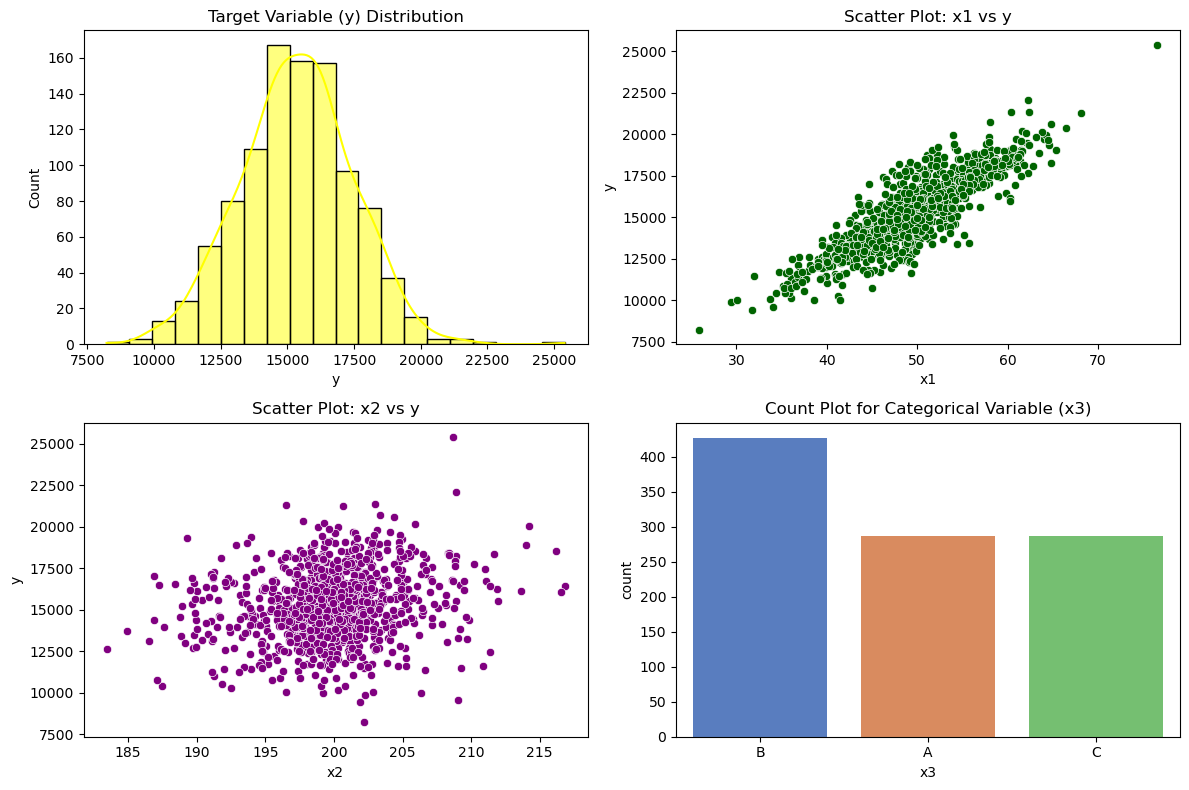

<bound method NDFrame.describe of                 y         x1          x2 x3
0    18546.674932  58.620100  202.906299  B
1    16616.498903  56.019437  192.718794  B
2    12773.312433  47.857470  189.915798  A
3    14613.038340  46.831493  199.289231  B
4    16549.372517  51.656511  201.500167  C
..            ...        ...         ... ..
995  14460.386067  48.609211  200.377106  C
996  15042.981309  48.798773  198.014740  B
997  15754.974480  49.966635  200.496834  A
998  18129.404048  59.425034  198.509978  A
999  16380.784037  46.423217  201.724777  C

[1000 rows x 4 columns]>


In [52]:
# Distribution of individual variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram of target variable 'y'
sns.histplot(data['y'], bins=20, kde=True, ax=axes[0, 0], color='yellow')
axes[0, 0].set_title("Target Variable (y) Distribution")

# x1 vs y
sns.scatterplot(x='x1', y='y', data=data, ax=axes[0, 1], color='darkgreen')
axes[0, 1].set_title("Scatter Plot: x1 vs y")

# x2 vs y
sns.scatterplot(x='x2', y='y', data=data, ax=axes[1, 0], color='purple')
axes[1, 0].set_title("Scatter Plot: x2 vs y")

# categorical variable x3
sns.countplot(x='x3', data=data, ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("Count Plot for Categorical Variable (x3)")

plt.tight_layout()
plt.show()

# Display summary statistics
print(data.describe)

C:\Users\Asus\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


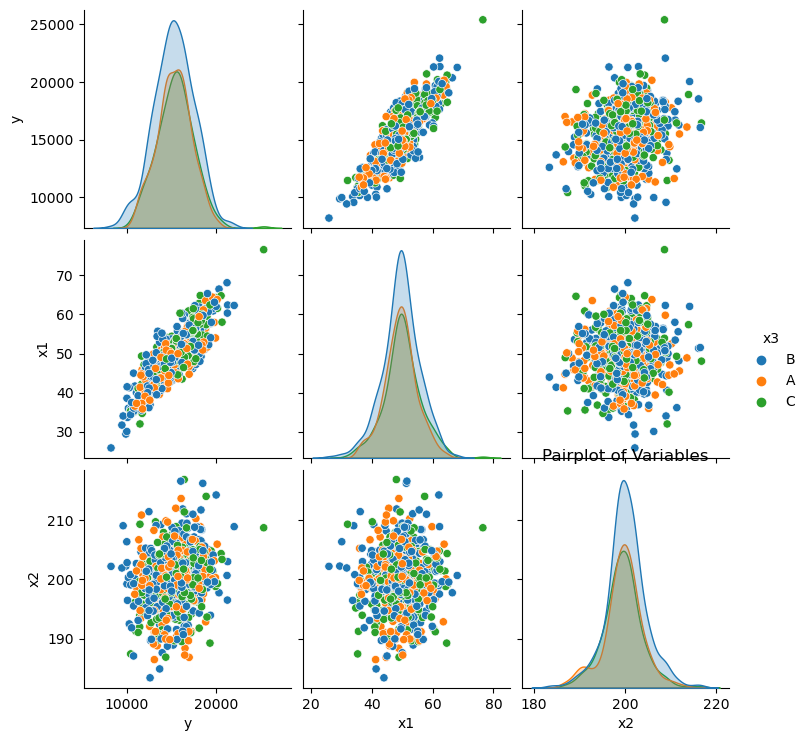

In [54]:
sns.pairplot(data, hue='x3')
plt.title("Pairplot of Variables")
plt.show()

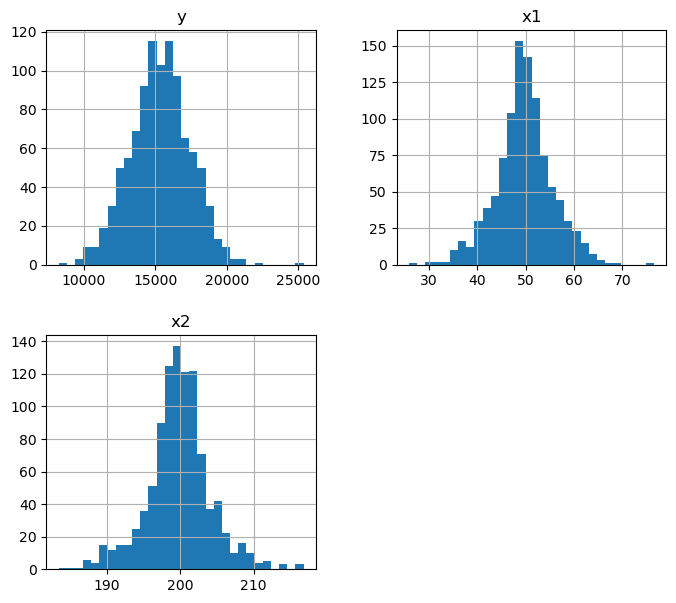

In [56]:
data[['y','x1','x2']].hist(bins=30,figsize=(8,7))
plt.show()

Text(0.5, 1.0, 'boxplot of x2')

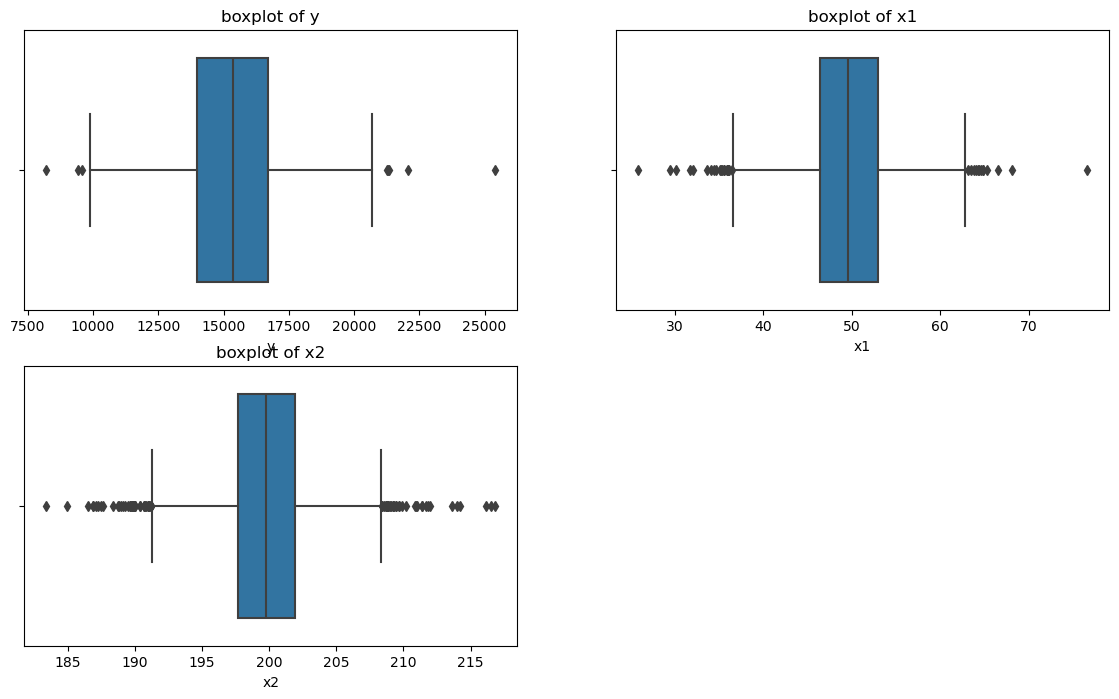

In [58]:
# Before Outliar Handling
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='y')
plt.title('boxplot of y')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='x1')
plt.title('boxplot of x1')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='x2')
plt.title('boxplot of x2')


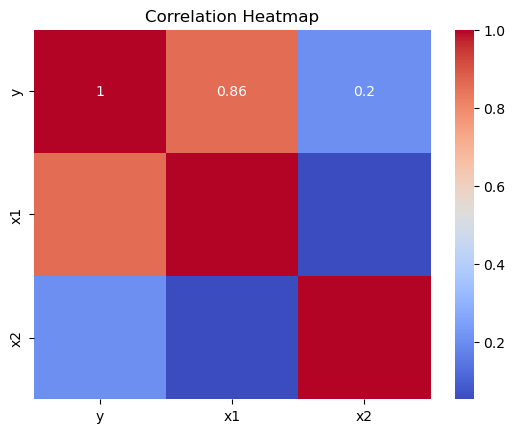

In [60]:
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Ploting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Data Prepration

In [62]:
# Data Cleaning
# Check for missing values
print("Missing Values:\n", data.isnull().sum())
# Remove rows with critical missing values
data.dropna(subset=['x1', 'x2', 'x3'], inplace=True)


Missing Values:
 y     0
x1    0
x2    0
x3    0
dtype: int64


C:\Users\Asus\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


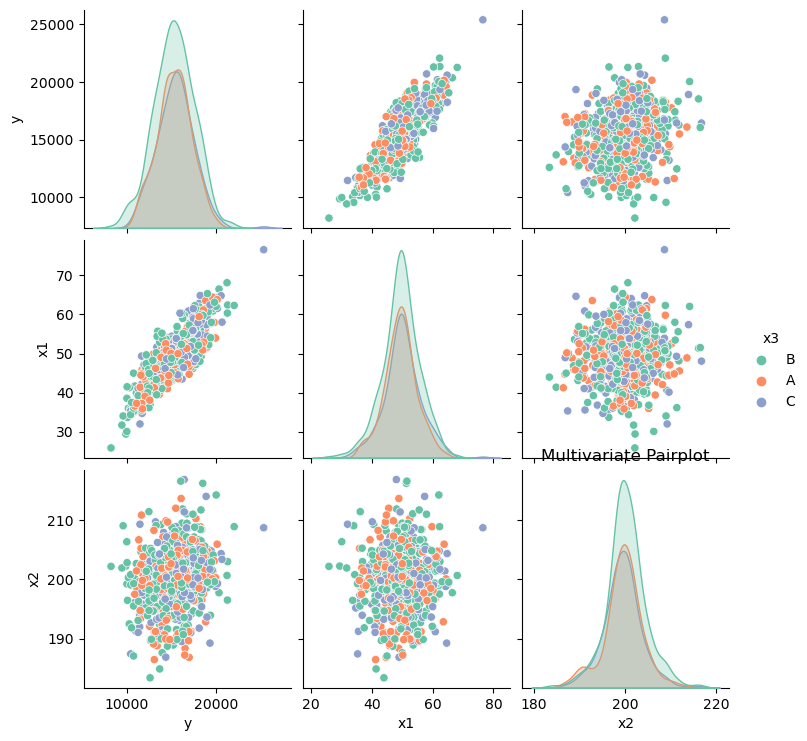

In [64]:
#Multivariate Analysis (Pairplot after Outliar Handling)
sns.pairplot(data, hue='x3', palette='Set2')
plt.title("Multivariate Pairplot")
plt.show()

In [66]:
# Outliar Handling
def outlier(col):

    q1, q3 = np.percentile(col, [25, 75])

    IQR = q3 - q1

    LW = q1 - 1.5 * IQR

    UW = q3 + 1.5 * IQR

    return LW, UW
 

In [68]:
for i in ['y','x1', 'x2']:
    lw, uw = outlier(data[i])
    data[i] = np.where(data[i] > uw, uw, data[i])
    data[i] = np.where(data[i] < lw, lw, data[i])

In [70]:
data = data[(np.abs(stats.zscore(data[['x1', 'x2']])) < 3).all(axis=1)]

Text(0.5, 1.0, 'Boxplot of x2')

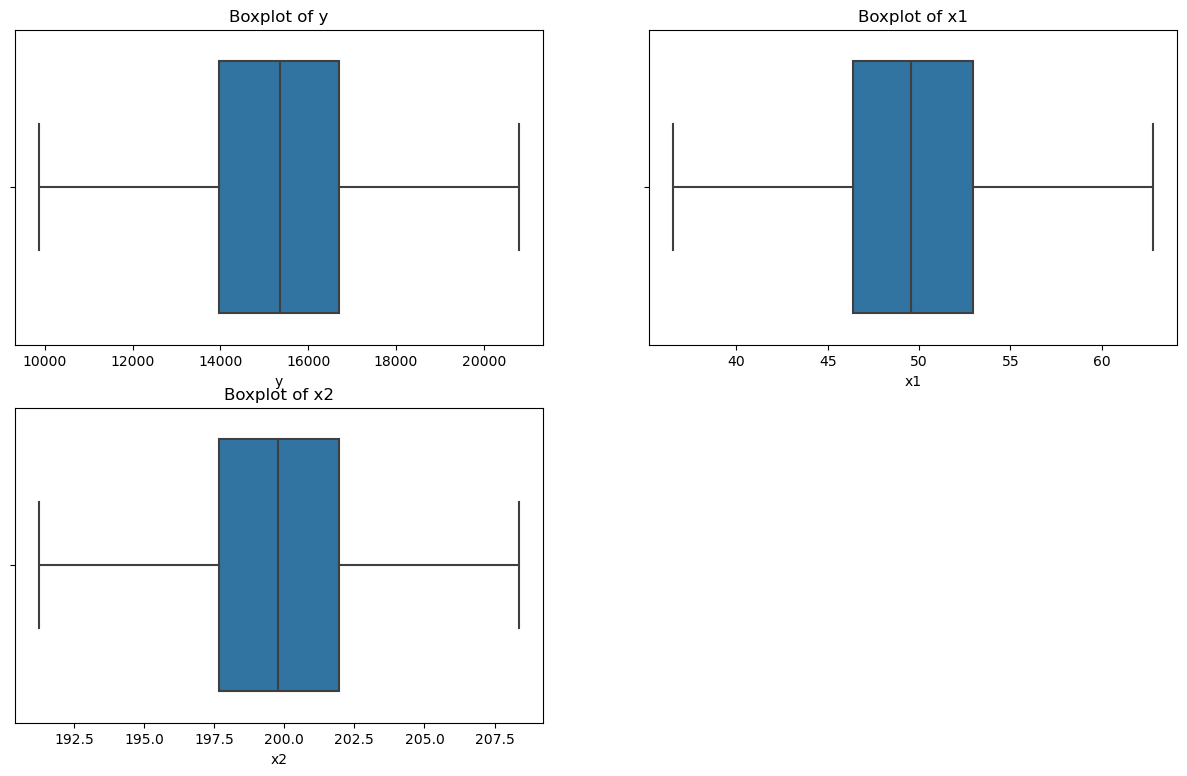

In [72]:
plt.figure(figsize = (15, 9))
 
plt.subplot(2, 2, 1)
sns.boxplot(data = data, x = 'y')
plt.title('Boxplot of y')
 
plt.subplot(2, 2, 2)
sns.boxplot(data = data, x = 'x1')
plt.title('Boxplot of x1')
 
plt.subplot(2, 2, 3)
sns.boxplot(data = data, x = 'x2')
plt.title('Boxplot of x2')

In [74]:
# Data Preprocessing
# One-hot encode categorical variable and scale numerical variables using a pipeline
categorical_features = ['x3']
numerical_features = ['x1', 'x2']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [76]:
# Log-transform the dependent variable 'y' to improve normality
data['y'] = np.log(data['y'] + 1)  # Added 1 to avoid issues with zero or negative values

In [82]:
# Encode the categorical variable x3 using one-hot encoding
data_encoded1 = pd.get_dummies(data, columns=['x3'])

In [80]:
# original and cleaned data
print(f"Original data dimensions: {datacopy.describe}")
print(f"Cleaned data dimensions: {data.describe}")

Original data dimensions: <bound method NDFrame.describe of                 y         x1          x2 x3
0    18546.674932  58.620100  202.906299  B
1    16616.498903  56.019437  192.718794  B
2    12773.312433  47.857470  189.915798  A
3    14613.038340  46.831493  199.289231  B
4    16549.372517  51.656511  201.500167  C
..            ...        ...         ... ..
995  14460.386067  48.609211  200.377106  C
996  15042.981309  48.798773  198.014740  B
997  15754.974480  49.966635  200.496834  A
998  18129.404048  59.425034  198.509978  A
999  16380.784037  46.423217  201.724777  C

[1000 rows x 4 columns]>
Cleaned data dimensions: <bound method NDFrame.describe of             y         x1          x2 x3
0    9.828100  58.620100  202.906299  B
1    9.718212  56.019437  192.718794  B
2    9.455192  47.857470  191.242679  A
3    9.589738  46.831493  199.289231  B
4    9.714164  51.656511  201.500167  C
..        ...        ...         ... ..
995  9.579237  48.609211  200.377106  C
996  9.

In [84]:
# Separate features (X) and target (y)
X = data_encoded1.drop('y', axis=1)
y = data_encoded1['y']

## Modelling(Encoding Categorical Variables)

### Setting Random seed

In [193]:
random_seed = 23237252

### Split the data into training and testing sets (80% train, 20% test)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [90]:
# Ridge Model to increase Optimization of MLR
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [92]:
# Lasso Model to increase Optimization of MLR
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [101]:
# Make predictions on the test data
y_pred = linear_model.predict(X_test)

## Interpretation

In [103]:
coefficients =linear_model.coef_
intercept = linear_model.intercept_

In [105]:
coefficients, intercept

(array([ 0.02086612,  0.00546459,  0.00550045, -0.00744192,  0.00194147]),
 7.501313576128499)

In [107]:
import statsmodels.api as sm
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Diagnostics

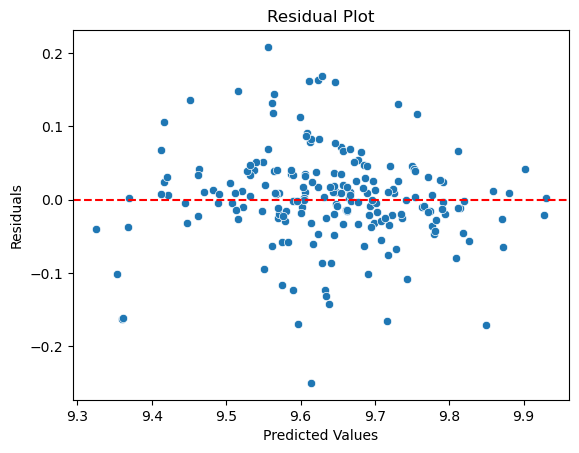

In [116]:
# Residual Plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

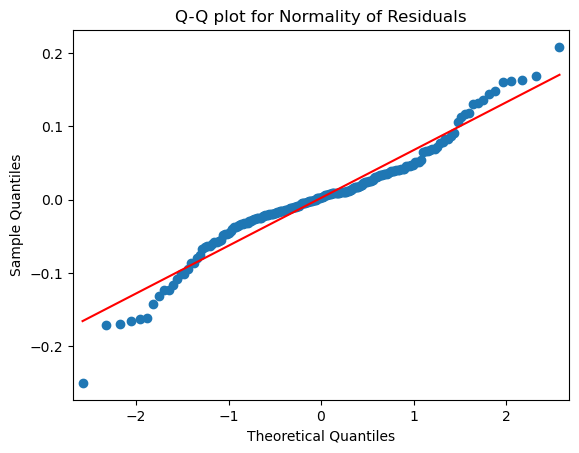

Durbin-Watson statistic: 2.1871622361222998


In [143]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

# Normality of residuals - Q-Q plot
qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q plot for Normality of Residuals")
plt.show()

# Check the Durbin-Watson statistic for autocorrelation in residuals
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

# Durbin-Watson statistic close to 2 indicates no autocorrelation in residuals

C:\Users\Asus\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


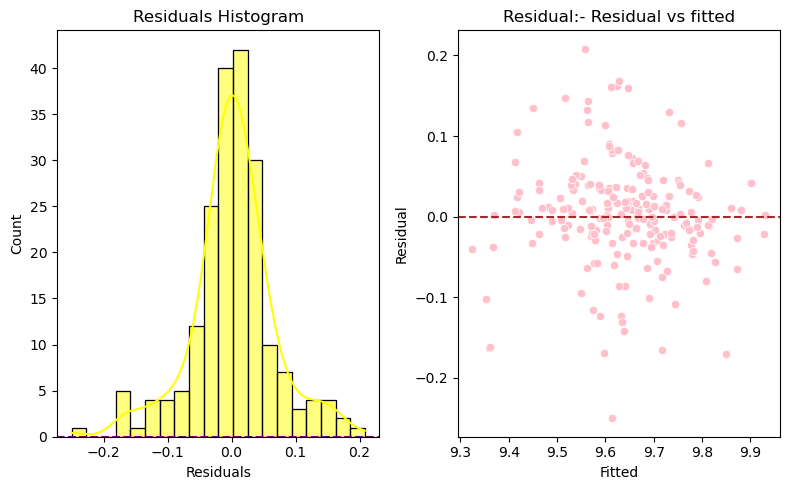

In [198]:
# difference between actual and predicted values
residuals = y_test - y_pred

# Plot the residuals histogram
plt.figure(figsize=(8, 5))
plt.subplot(121)
sns.histplot(residuals, kde=True, bins=20, color='yellow')
plt.axhline(0, color='purple', linestyle='--')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')

# Plot the residuals vs fitted values
plt.subplot(122)
sns.scatterplot(x=y_pred, y=residuals, color='pink')
plt.axhline(0, color='brown', linestyle='--')
plt.title('Residual:- Residual vs fitted')
plt.xlabel('Fitted')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Ensure all data is numeric and drop NaN values
X_train_sm = sm.add_constant(X_train)
X_train_sm = X_train_sm.dropna()
X_train_sm = X_train_sm.astype(float)

X_train_sm = X_train_sm.drop(columns=['x3_A'])

correlation_matrix = X_train_sm.corr()
print("Correlation Matrix:\n", correlation_matrix)

# 5. Multicollinearity
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif["Feature"] = X_train_sm.columns
print("VIF Data:\n", vif)


Correlation Matrix:
        const        x1        x2      x3_B      x3_C
const    NaN       NaN       NaN       NaN       NaN
x1       NaN  1.000000  0.042392 -0.008279  0.034466
x2       NaN  0.042392  1.000000  0.065552 -0.062803
x3_B     NaN -0.008279  0.065552  1.000000 -0.542719
x3_C     NaN  0.034466 -0.062803 -0.542719  1.000000
VIF Data:
            VIF Feature
0  2590.543740   const
1     1.003307      x1
2     1.007348      x2
3     1.419686    x3_B
4     1.420979    x3_C


## Evaluation

In [210]:
# Evaluate the model performance
r2 = r2_score(y_test, y_pred)  # R² (coefficient of determination)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print the results
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R²: 0.7461283451095767
MSE: 0.004249784231650473
MAE: 0.04546740554710334


In [147]:
# # Print the results
print("Linear Regression - MSE:", mse, "R²:", r2)
print("Ridge Regression - MSE:", mse_ridge, "R²:", r2_ridge)
print("Lasso Regression - MSE:", mse_lasso, "R²:", r2_lasso)

Linear Regression - MSE: 0.004249784231650473 R²: 0.7461283451095767
Ridge Regression - MSE: 0.004249657347240059 R²: 0.7461359248721
Lasso Regression - MSE: 0.00477867178213764 R²: 0.714533903986392


In [151]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.004249784231650473
R-squared (R²): 0.7461283451095767


In [153]:
import statsmodels.api as sm

# Add constant to X_train for the intercept term
X_train_sm = sm.add_constant(np.array(X_train))  # Add constant to X_train
y_train_np = np.array(y_train)

# Convert data to float to ensure compatibility
X_train_sm = X_train_sm.astype(float)
y_train_np = y_train_np.astype(float)

# Double-check for NaN or Inf values
print(f"X_train_sm contains NaN: {np.isnan(X_train_sm).any()}, contains Inf: {np.isinf(X_train_sm).any()}")
print(f"y_train_np contains NaN: {np.isnan(y_train_np).any()}, contains Inf: {np.isinf(y_train_np).any()}")

# Fit the OLS model
ols_model = sm.OLS(y_train_np, X_train_sm).fit()
print(ols_model.summary())


X_train_sm contains NaN: False, contains Inf: False
y_train_np contains NaN: False, contains Inf: False
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     579.7
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          6.00e-234
Time:                        21:31:50   Log-Likelihood:                 978.14
No. Observations:                 800   AIC:                            -1946.
Df Residuals:                     795   BIC:                            -1923.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

### Visualizing the result

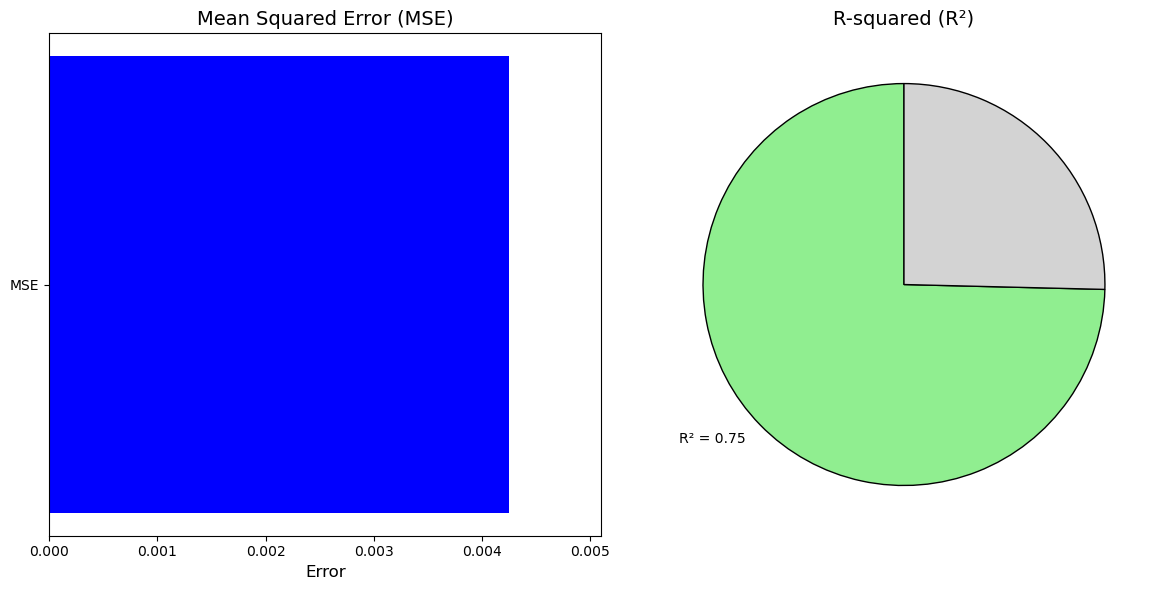

In [160]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for MSE (Bar plot)
mse_value = mse if mse > 0 else 0.01 
ax1.barh(['MSE'], [mse_value], color='blue')
ax1.set_xlim(0, mse_value * 1.2)  
ax1.set_title('Mean Squared Error (MSE)', fontsize=14)
ax1.set_xlabel('Error', fontsize=12)

# Plot for R² (Circular gauge)
ax2.pie([r2, 1 - r2], labels=[f'R² = {r2:.2f}', ''], colors=['lightgreen', 'lightgrey'], startangle=90, wedgeprops={'edgecolor': 'black'})
ax2.set_title('R-squared (R²)', fontsize=14)

plt.tight_layout()
plt.show()


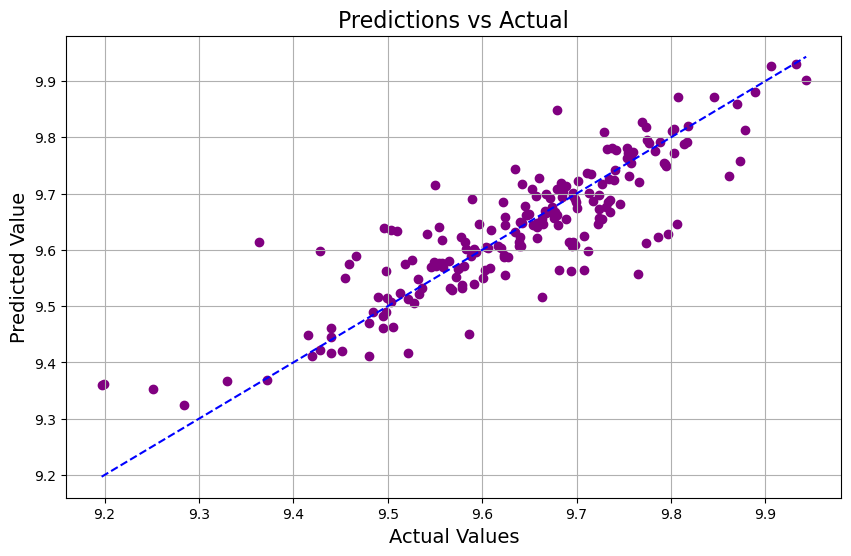

In [200]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.title('Predictions vs Actual', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
plt.grid()
plt.show()

# **********************************************************************************

# Introduction - Time Series Analysis

The dataset consists of:

An index column (likely the time step).
A column x representing the time series values.
To perform a time series analysis, I'll:
Split the data into training and testing sets (80% for training and 20% for testing).
Fit a basic time series model (e.g., an ARIMA model).
Evaluate the model's performance.

## Importing and loading libraries and Data

In [345]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels.tsa.base.tsa_model")
warnings.filterwarnings("ignore", category=FutureWarning, module="statsmodels.tsa.base.tsa_model")

# Load the dataset
ts_file_path = "C:\\Users\\Asus\\OneDrive\\Desktop\\Stats CA\\ts2.csv"
ts_data = pd.read_csv(ts_file_path)

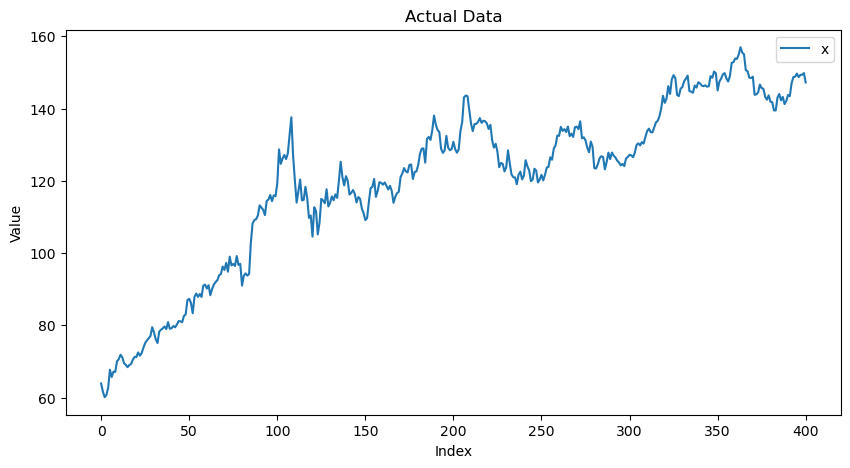

count    401.000000
mean     119.913136
std       23.277390
min       60.084999
25%      111.970001
50%      124.580002
75%      135.830002
max      156.979996
Name: x, dtype: float64


In [347]:
plt.figure(figsize=(10, 5))
plt.plot(ts_data['x'], label='x')
plt.title('Actual Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Show description of the variable 'x'
description = ts_data['x'].describe()
print(description)


## EDA(Exploratory Data Analysis)

In [349]:
print(ts_data.columns)

Index(['Unnamed: 0', 'x'], dtype='object')


In [351]:
print(ts_data.head())

   Unnamed: 0          x
0           1  63.900002
1           2  61.625000
2           3  60.084999
3           4  60.700001
4           5  62.724998


In [353]:
print(ts_data.info)

<bound method DataFrame.info of      Unnamed: 0           x
0             1   63.900002
1             2   61.625000
2             3   60.084999
3             4   60.700001
4             5   62.724998
..          ...         ...
396         397  148.679993
397         398  149.330002
398         399  149.360001
399         400  149.820007
400         401  147.220001

[401 rows x 2 columns]>


count    401.000000
mean     119.913136
std       23.277390
min       60.084999
25%      111.970001
50%      124.580002
75%      135.830002
max      156.979996
Name: x, dtype: float64


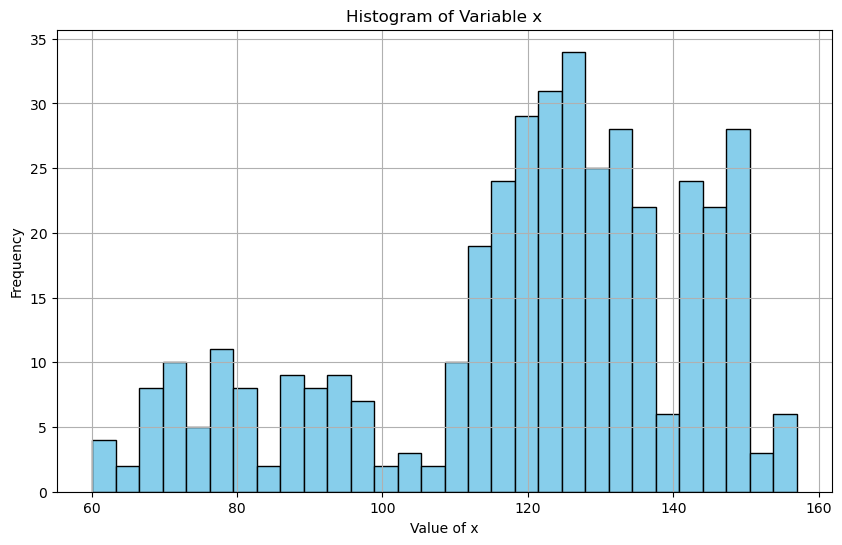

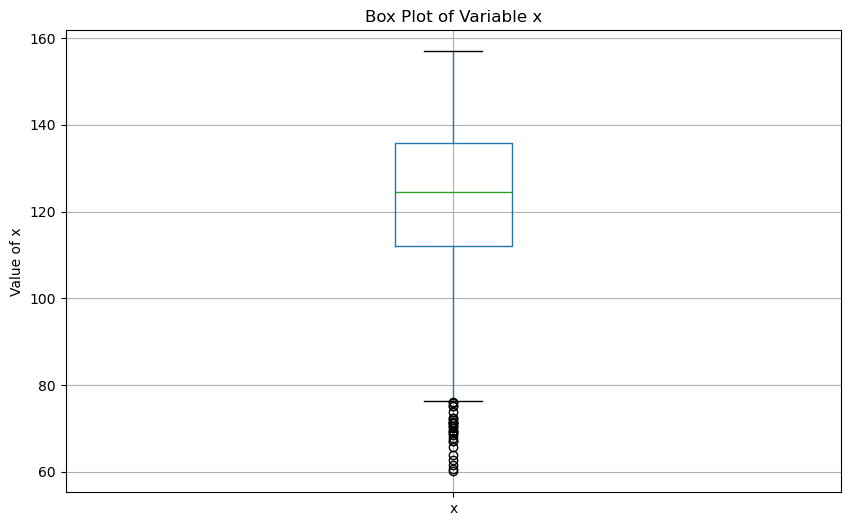

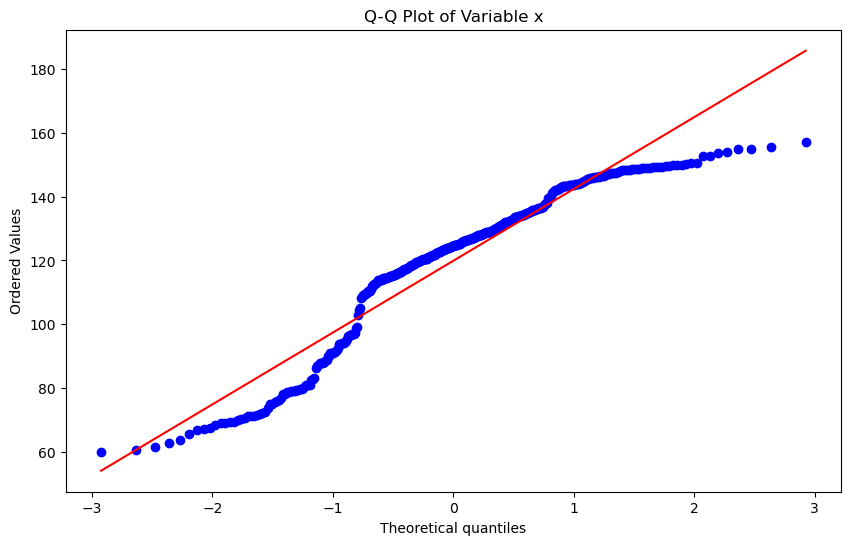

Shapiro-Wilk test statistic: 0.9212897466140753, p-value: 1.1938867648310626e-13


In [335]:
# Summary statistics
summary_stats = ts_data['x'].describe()
print(summary_stats)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ts_data['x'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Variable x')
plt.xlabel('Value of x')
plt.ylabel('Frequency')
plt.show()
# Plotting box plot
plt.figure(figsize=(10, 6))
ts_data.boxplot(column='x')
plt.title('Box Plot of Variable x')
plt.ylabel('Value of x')
plt.show()
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(ts_data['x'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Variable x')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(ts_data['x'])
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')


## Data Prepration
### Data Cleaning

In [355]:
print(f"Missing values in the dataset: \n{ts_data.isnull().sum()}")

print(f"Number of duplicate rows: {ts_data.duplicated().sum()}")

ts_data = ts_data.drop_duplicates()

print(f"Number of duplicate rows after removal: {ts_data.duplicated().sum()}")

Missing values in the dataset: 
Unnamed: 0    0
x             0
dtype: int64
Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [357]:
# Set the first column as the index and use the second as the time series values
ts_data.set_index(ts_data.columns[0], inplace=True)
ts_data.index.name = 'Time'
ts_data.index = pd.to_datetime(ts_data.index)
ts_series = ts_data.iloc[:, 0]

### Check Stationary

In [359]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) Test
# The ADF test helps determine if the time series is stationary.
result = adfuller(ts_data['x'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Check stationarity based on the p-value
if result[1] < 0.05:  # A p-value < 0.05 indicates the series is stationary
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Consider differencing the series.")


ADF Statistic: -2.3825332130369183
p-value: 0.14672708721616745
The time series is not stationary. Consider differencing the series.


### Box Cox transformation

In [276]:
def inv_boxcox(x, lam):
    if lam == 0:
        return np.exp(x)
    else:
        return (x * lam + 1) ** (1 / lam)

ts_series_boxcox, lambda_ = boxcox(ts_series)

### Decomposition

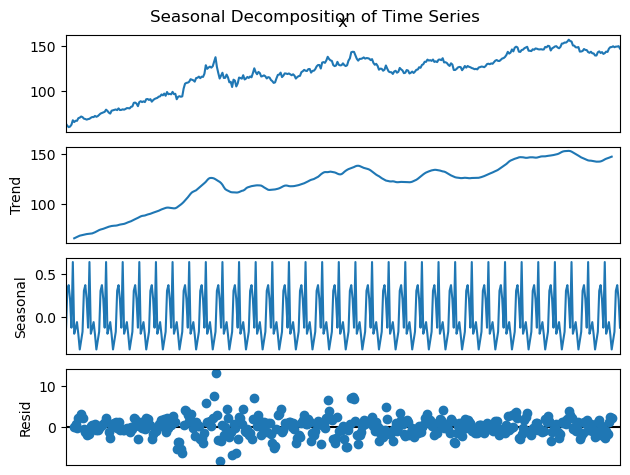

In [278]:
from statsmodels.tsa.seasonal import seasonal_decompose
# This helps identify patterns in the data.
decomposition = seasonal_decompose(ts_data['x'], period=12, model='additive')

decomposition.plot()
plt.suptitle('Seasonal Decomposition of Time Series')
plt.show()


### Differencing

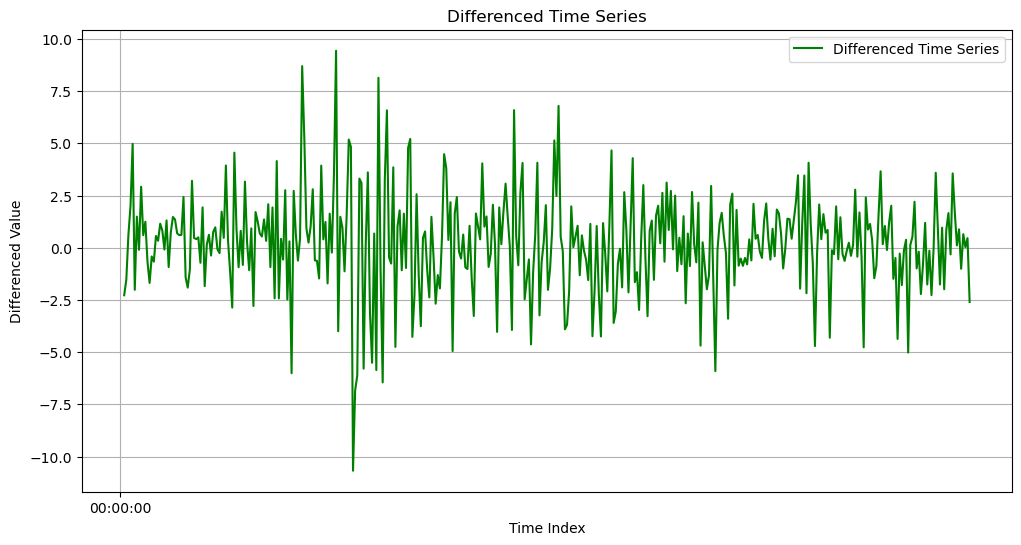

In [365]:
# Differencing helps remove trends to make the series stationary.
time_series_diff = ts_data['x'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(time_series_diff, label='Differenced Time Series', color='green')
plt.title('Differenced Time Series')
plt.xlabel('Time Index')
plt.ylabel('Differenced Value')
plt.legend()
plt.grid()
plt.show()


### Splitting the data into training and testing sets (80% train, 20% test)

In [284]:
split_index = int(len(ts_series_boxcox) * 0.8)
train, test = ts_series_boxcox[:split_index], ts_series_boxcox[split_index:]

## Modelling

In [286]:
# Finding the best ARIMA parameters with seasonal component
auto_model = auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True)
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6605.808, Time=2.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6612.343, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6616.033, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6616.008, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6612.355, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=6604.435, Time=1.68 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=6604.625, Time=0.82 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=6605.947, Time=4.19 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=6604.723, Time=1.95 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=6.84 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=6614.012, Time=0.58 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=6613.484, Time=0.33 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=6604.778, Time=2.00 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=6604.764, Time=1.42 sec
 ARIMA(1,1,1)(0,0,1)[12]

### Model Fitting

In [292]:
# Fitting the ARIMA model with the best parameters
model = ARIMA(train, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit(cov_type='oim')

### Predictions using Arima

In [294]:
# predictions on the test set using ARIMA
arima_forecast = model_fit.get_forecast(steps=len(test))
arima_predictions_boxcox = arima_forecast.predicted_mean
arima_conf_int = arima_forecast.conf_int()

In [296]:
# Inverse log transformation on predictions
arima_predictions = inv_boxcox(arima_predictions_boxcox, lambda_)
# Inverse Box-Cox transformation for confidence intervals
conf_int_lower = inv_boxcox(arima_conf_int[:, 0], lambda_)
conf_int_upper = inv_boxcox(arima_conf_int[:, 1], lambda_)

In [298]:
# Fine-tune Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train).fit()
ses_predictions_boxcox = ses_model.forecast(steps=len(test))
ses_predictions = inv_boxcox(ses_predictions_boxcox, lambda_)

C:\Users\Asus\anaconda3.1\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


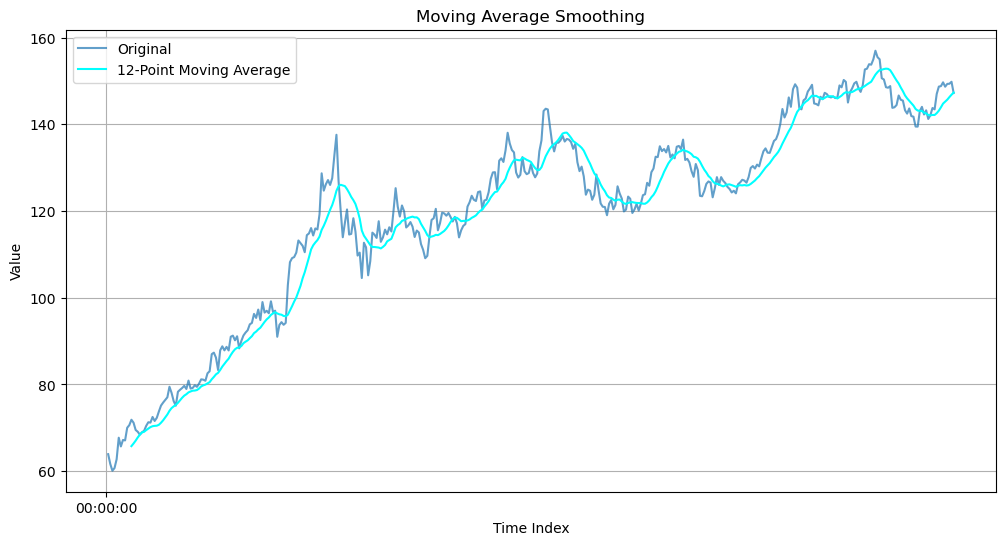

In [300]:
# Moving average is used to smooth the series and highlight trends.
ts_data['Moving_Avg'] = ts_data['x'].rolling(window=12).mean()

# Plot original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(ts_data['x'], label='Original', alpha=0.7)
plt.plot(ts_data['Moving_Avg'], label='12-Point Moving Average', color='cyan')
plt.title('Moving Average Smoothing') 
plt.xlabel('Time Index') 
plt.ylabel('Value') 
plt.legend() 
plt.grid() 
plt.show()

In [302]:
# Fine-tune Holt’s method
holt_model = Holt(train).fit()
holt_predictions_boxcox = holt_model.forecast(steps=len(test))
holt_predictions = inv_boxcox(holt_predictions_boxcox, lambda_)

C:\Users\Asus\anaconda3.1\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Performing Hybrid Model (Arima + SES + Holt)

In [304]:
# Hybrid Model: Weighted average of ARIMA, SES, and Holt predictions
hybrid_predictions = (arima_predictions + ses_predictions + holt_predictions) / 3

## Interpretation

In [375]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  320
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3296.900
Date:                Mon, 02 Dec 2024   AIC                           6603.800
Time:                        11:30:07   BIC                           6622.626
Sample:                             0   HQIC                          6611.318
                                - 320                                         
Covariance Type:                  oim                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1999      0.040    -29.789      0.000      -1.279      -1.121
ar.L2         -0.8976      0.039    -22.740      0.000      -0.975      -0.820
ma.L1          1.3038      0.028     46.984      0.0

## Diagnostics

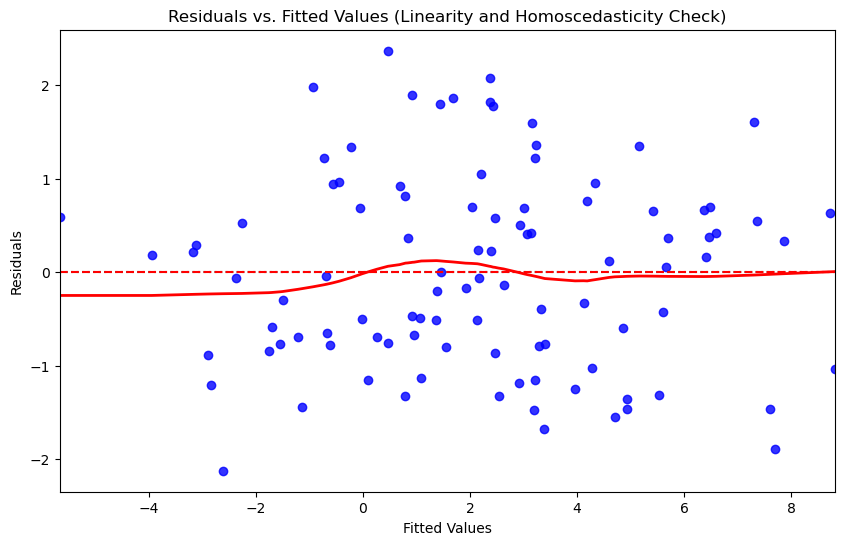

Durbin-Watson statistic: 1.9450573716040487


In [382]:
#Linearity & Homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="blue", line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (Linearity and Homoscedasticity Check)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Independence of Errors
dw_stat = durbin_watson(y_test - y_pred)
print(f'Durbin-Watson statistic: {dw_stat}')

## Evaluation

### Calculate error metrics

In [306]:
mae_hybrid = mean_absolute_error(inv_boxcox(test, lambda_), hybrid_predictions)
rmse_hybrid = np.sqrt(mean_squared_error(inv_boxcox(test, lambda_), hybrid_predictions))
mape_hybrid = np.mean(np.abs((inv_boxcox(test, lambda_) - hybrid_predictions) / inv_boxcox(test, lambda_))) * 100

In [308]:
# Print Hybrid model error metrics
print(f'Hybrid - Mean Absolute Error (MAE): {mae_hybrid}')
print(f'Hybrid - Root Mean Squared Error (RMSE): {rmse_hybrid}')
print(f'Hybrid - Mean Absolute Percentage Error (MAPE): {mape_hybrid:.2f}%')

Hybrid - Mean Absolute Error (MAE): 3.3760644565929625
Hybrid - Root Mean Squared Error (RMSE): 4.318977075365975
Hybrid - Mean Absolute Percentage Error (MAPE): 2.30%


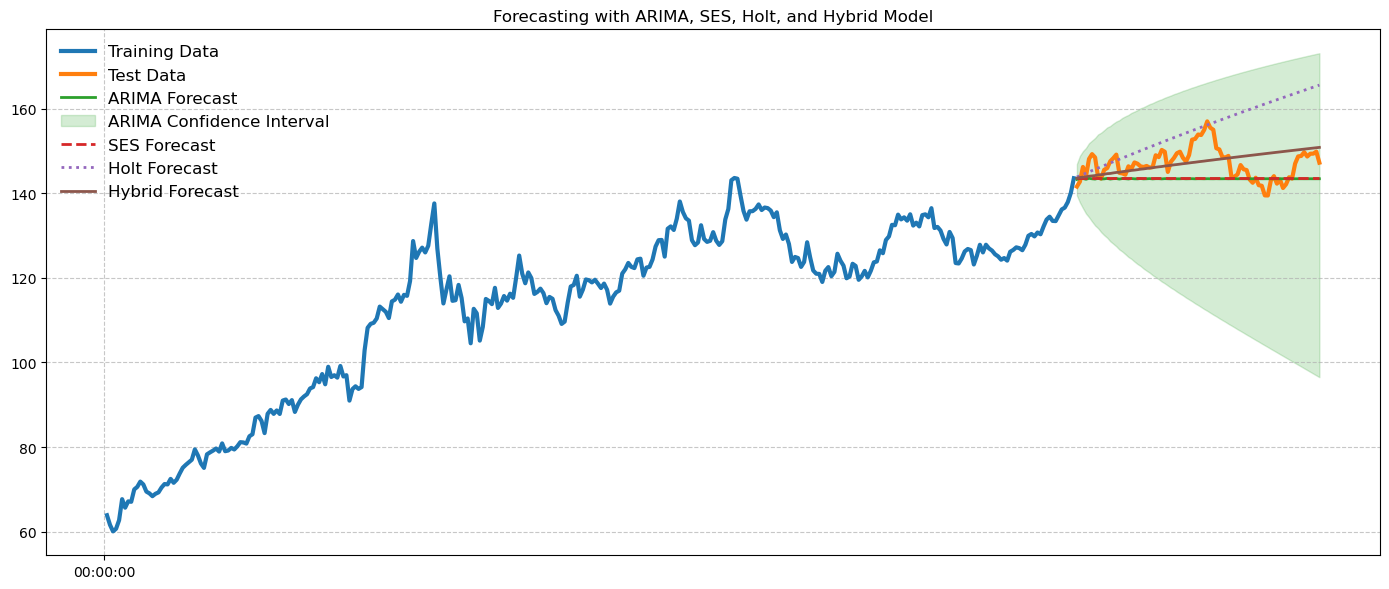

In [327]:
# Final visualization with Forecasting (ARIMA, SES, Holt, Hybrid)
fig, ax = plt.subplots(figsize=(14, 6))

# Plotting Training and Test Data
ax.plot(ts_series.index[:split_index], ts_series.iloc[:split_index], label='Training Data', color='#1f77b4', linewidth=3)
ax.plot(ts_series.index[split_index:], ts_series.iloc[split_index:], label='Test Data', color='#ff7f0e', linewidth=3)

ax.plot(ts_series.index[split_index:], arima_predictions, label='ARIMA Forecast', color='#2ca02c', linewidth=2)
ax.fill_between(ts_series.index[split_index:], conf_int_lower, conf_int_upper, color='#2ca02c', alpha=0.2, label='ARIMA Confidence Interval')
ax.plot(ts_series.index[split_index:], ses_predictions, label='SES Forecast', color='#d62728', linestyle='--', linewidth=2)
ax.plot(ts_series.index[split_index:], holt_predictions, label='Holt Forecast', color='#9467bd', linestyle=':', linewidth=2)
ax.plot(ts_series.index[split_index:], hybrid_predictions, label='Hybrid Forecast', color='#8c564b', linewidth=2)

ax.set_title('Forecasting with ARIMA, SES, Holt, and Hybrid Model')
ax.legend(loc='upper left', fontsize=12, frameon=False)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()

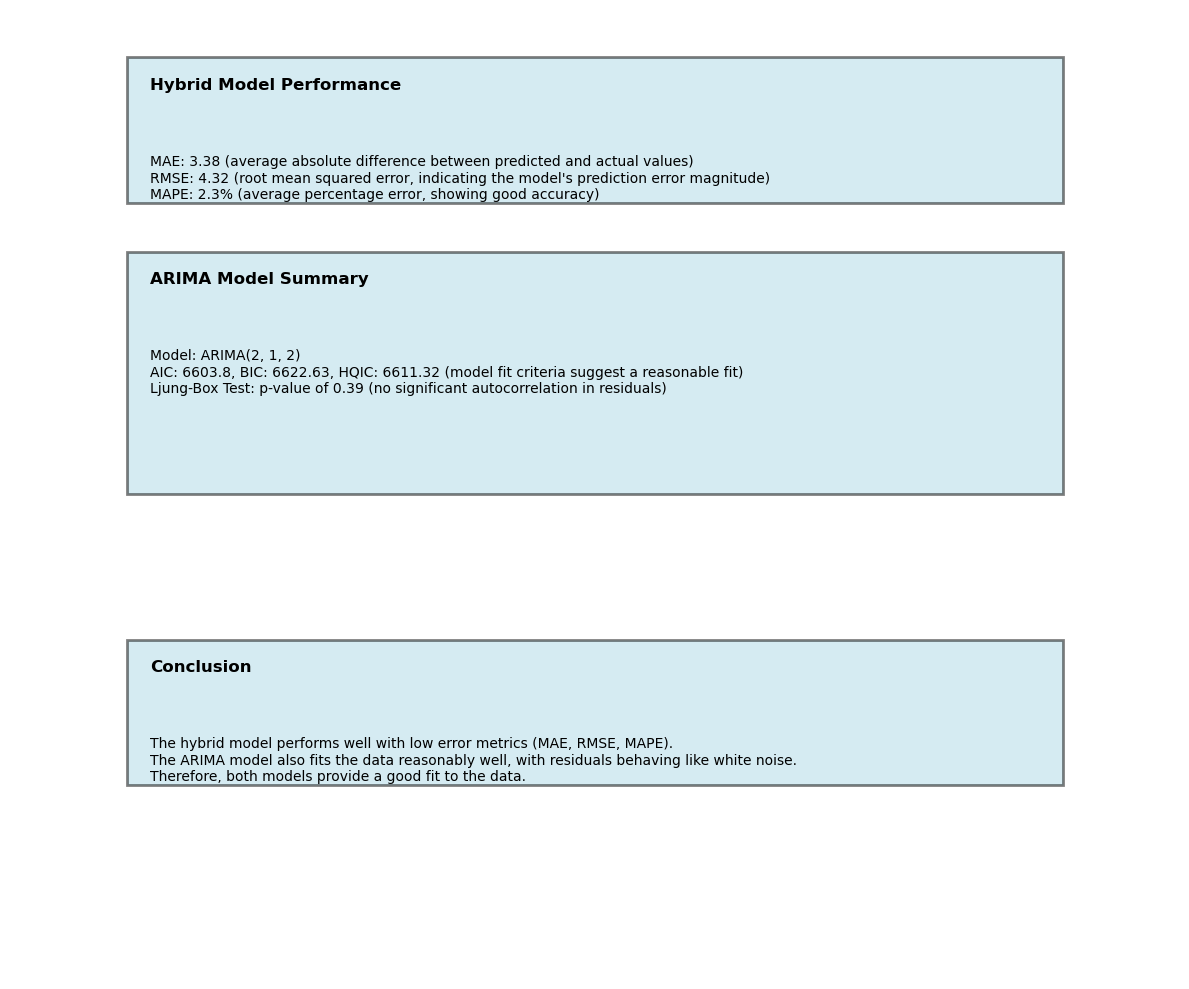

In [316]:
import matplotlib.pyplot as plt

# Model Evaluation Metrics for Hybrid Model
mae = 3.38
rmse = 4.32
mape = 2.30

# ARIMAX Model Fit Criteria
aic = 6603.80
bic = 6622.63
hqic = 6611.32
ljung_box_p_value = 0.39

# Creating a figure for the report
fig, ax = plt.subplots(figsize=(12, 10))

report_sections = [
    {
        'title': 'Hybrid Model Performance',
        'content': f"MAE: {mae} (average absolute difference between predicted and actual values)\n"
                   f"RMSE: {rmse} (root mean squared error, indicating the model's prediction error magnitude)\n"
                   f"MAPE: {mape}% (average percentage error, showing good accuracy)"
    },
    {
        'title': 'ARIMA Model Summary',
        'content': f"Model: ARIMA(2, 1, 2)\n"
                   f"AIC: {aic}, BIC: {bic}, HQIC: {hqic} (model fit criteria suggest a reasonable fit)\n"
                   f"Ljung-Box Test: p-value of {ljung_box_p_value} (no significant autocorrelation in residuals)"
    },
    {
        'title': 'Conclusion',
        'content': "The hybrid model performs well with low error metrics (MAE, RMSE, MAPE).\n"
                   "The ARIMA model also fits the data reasonably well, with residuals behaving like white noise."
                   "\nTherefore, both models provide a good fit to the data."
    }
]

box_positions = [(0.1, 0.8), (0.1, 0.5), (0.1, 0.2)]
box_sizes = [(0.8, 0.15), (0.8, 0.25), (0.8, 0.15)]

# Plotting each section in a box
for i, section in enumerate(report_sections):
    # Create a box for the section
    ax.add_patch(plt.Rectangle(box_positions[i], box_sizes[i][0], box_sizes[i][1], linewidth=2, edgecolor='black', facecolor='lightblue', alpha=0.5))
    
    # Add title text
    ax.text(box_positions[i][0] + 0.02, box_positions[i][1] + box_sizes[i][1] - 0.02,
            section['title'], fontsize=12, fontweight='bold', ha='left', va='top')

    # Add content text
    ax.text(box_positions[i][0] + 0.02, box_positions[i][1] + box_sizes[i][1] - 0.1,
            section['content'], fontsize=10, ha='left', va='top', wrap=True)

ax.axis('off')

plt.tight_layout()
plt.show()
